DESCRIPTION

Project Objective:


Build a CNN model that classifies the given pet images correctly into dog and cat images. 
The project scope document specifies the requirements for the project “Pet Classification Model Using CNN.” Apart from specifying the functional and non-functional requirements for the project, it also serves as an input for project scoping. 


Project Description and Scope: 


You are provided with a collection of images of pets, that is, cats and dogs. These images are of different sizes with varied lighting conditions and they should be used as inputs for your model.

You are expected to write the code for CNN image classification model using TensorFlow that trains on the data and calculates the accuracy score on the test data. 


Project Guidelines:


Begin by creating the ipynb file in the same parent folder where the downloaded data set is kept. The CNN model should have the following layers: 

● Input layer 

● Convolutional layer 1 with 32 filters of kernel size[5,5]

● Pooling layer 1 with pool size[2,2] and stride 2 

● Convolutional layer 2 with 64 filters of kernel size[5,5] 

● Pooling layer 2 with pool size[2,2] and stride 2 

● Dense layer whose output size is fixed in the hyper parameter: fc_size=32 

● Dropout layer with dropout probability 0.4 

Predict the class by doing a softmax on the output of the dropout layers. 

This should be followed by training and evaluation: 

● For the training step, define the loss function and minimize it 

● For the evaluation step, calculate the accuracy 

Run the program for 100, 200, and 300 iterations, respectively. Follow this by a report on the final accuracy and loss on the evaluation data. 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split

In [2]:
#Creating Image Augmentation
train_datagen=ImageDataGenerator(rescale=1./255,
                            shear_range=.2,
                            zoom_range=.2,
                            rotation_range=40,
                            width_shift_range=.2,
                            height_shift_range=.2,
                            horizontal_flip=True,
                            fill_mode="nearest",
                            brightness_range=[.4,1.5])
test_datagen=ImageDataGenerator(rescale=1./255)

In [3]:
train_generator=train_datagen.flow_from_directory(directory="E:/data_sciene_course/simplilearn/Deep Learing/Project 3/data/train",
                  target_size=(32, 32), # resize to this size
                  color_mode="rgb", # for coloured images
                  batch_size=1, # number of images to extract from folder for every batch
                  class_mode="binary", # classes to predict
                  seed=2020 # to make the result reproducible
                  )

Found 40 images belonging to 2 classes.


In [4]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [5]:
test_generator=test_datagen.flow_from_directory(
                  directory="E:/data_sciene_course/simplilearn/Deep Learing/Project 3/data/test",
                  target_size=(32, 32), # resize to this size
                  color_mode="rgb", # for coloured images
                  batch_size=1, # number of images to extract from folder for every batch
                  class_mode="binary", # classes to predict
                  seed=2020 # to make the result reproducible
                  )

Found 20 images belonging to 2 classes.


Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


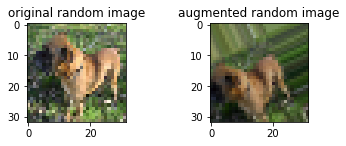

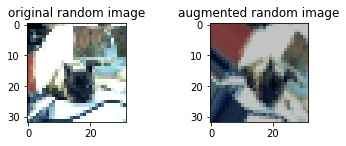

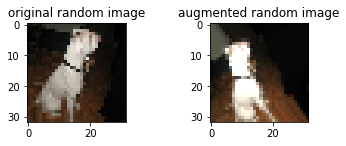

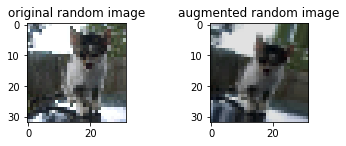

In [7]:
train_generator1=train_datagen.flow_from_directory(
                  directory="E:/data_sciene_course/simplilearn/Deep Learing/Project 3/data/train",
                  target_size=(32, 32), # resize to this size
                  color_mode="rgb", # for coloured images
                  batch_size=4, # number of images to extract from folder for every batch
                  class_mode="binary", # classes to predict
                  seed=2020 # to make the result reproducible
                  )
test_generator1=test_datagen.flow_from_directory(
                  directory="E:/data_sciene_course/simplilearn/Deep Learing/Project 3/data/train",
                  target_size=(32, 32), # resize to this size
                  color_mode="rgb", # for coloured images
                  batch_size=4, # number of images to extract from folder for every batch
                  class_mode="binary", # classes to predict
                  seed=2020 # to make the result reproducible
                  )
x_batch_augmented, y_batch_augmented = next(train_generator1)
x_batch_real, y_batch_real = next(test_generator1)
for i in range(4):
    image_augmented = x_batch_augmented[i]
    image_real = x_batch_real[i]
    title_add_on = "random image"
    #if y_batch_augmented[i][1]: title_add_on =  "dog vs cat"
    plt.subplot(221)
    plt.imshow(image_real)
    plt.title("original " + title_add_on)

        
    plt.subplot(222)
    plt.imshow(image_augmented)
    plt.title("augmented " + title_add_on)

    plt.show()


In [8]:
test_generator.class_indices

{'cats': 0, 'dogs': 1}

In [9]:
#Creating the Architechture for the CNN
classifier=Sequential()
classifier.add(Conv2D(32,(5,5),input_shape=(32,32,3),activation="relu", padding="valid"))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=(2, 2), padding='valid'))
classifier.add(Conv2D(64,(5,5),activation="relu", padding="valid"))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
classifier.add(Flatten())
classifier.add(Dense(32, activation="relu"))
classifier.add(Dropout(0.4))
classifier.add(Dense(2, activation="softmax"))

In [10]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                51232     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0

In [11]:
classifier.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [41]:
def model(epochs):
    classifier.fit_generator(train_generator,validation_data=test_generator,epochs=epochs,
                             verbose=False)
    x,y= classifier.evaluate(train_generator)
    print(f"For epochs={epochs},\n loss is {x:.2f}\n Accuracy is {y}")
    
    

In [43]:
#Executing the model 100 epochs
model(epochs=100)

40/40 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
For epochs=100,
 loss is 0.69
 Accuracy is 0.5


In [45]:
#Executing the model 200 epochs
model(epochs=200)

40/40 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5000
For epochs=200,
 loss is 0.69
 Accuracy is 0.5


In [46]:
#Executing the model 300 epochs
model(epochs=300)

40/40 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
For epochs=300,
 loss is 0.69
 Accuracy is 0.5


#### It can be seen that the loss and accuracy for epochs 100,200,300 is same i.e loss is .69 and accuraccy is .5

In [47]:
# Trying call backs
from tensorflow.keras.callbacks import Callback,CSVLogger,EarlyStopping,History,ModelCheckpoint
#Earlystopping
early_stop=EarlyStopping(monitor="val_loss", patience=5, verbose=10)
#CSVlogger logs epoch, acc, loss, val_acc,val_loss
log_csv=CSVLogger("my_logs.csv",separator=",", append=False)
callback_list=[early_stop,log_csv]

In [60]:
classifier.fit_generator(train_generator,validation_data=test_generator,epochs=100,
                         callbacks=callback_list)

Epoch 1/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5750 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
40/40 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.6000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
40/40 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.4750 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
40/40 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.6250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.6000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
40/40 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 00006: early stopping


#### At epochs No 6 the Model stopped due to call backs

In [61]:
#Evaluating the model with call backs
m,n=classifier.evaluate(train_generator)
print(f"With Call backs,\n loss is {m:.2f}\n Accuracy is {n}")

40/40 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5000
With Call backs,
 loss is 0.69
 Accuracy is 0.5


In [65]:
def list_full_paths(directory):
    return [os.path.join(directory, file) for file in os.listdir(directory)]


In [ ]:
#Creating dataframe for the test data
filepath_dogs="E:/data_sciene_course/simplilearn/Deep Learing/Project 3/data/train/dogs"
train_dogs=list_full_paths(filepath_dogs)
train_dog=pd.DataFrame({'filepath': train_dogs})

filepath_cat="E:/data_sciene_course/simplilearn/Deep Learing/Project 3/data/train/cats"
train_cats=list_full_paths(filepath_cat)
train_cat = pd.DataFrame({'filepath': train_cats})

train=pd.concat([train_cat,train_dog])
train['truth_label'] = np.where(train['filepath'].str.contains('dogs'), 'dogs', 'cats')


In [66]:
train.head()

,filepath,truth_label
0,E:/data_sciene_course/simplilearn/Deep Learing...,cats
1,E:/data_sciene_course/simplilearn/Deep Learing...,cats
2,E:/data_sciene_course/simplilearn/Deep Learing...,cats
3,E:/data_sciene_course/simplilearn/Deep Learing...,cats
4,E:/data_sciene_course/simplilearn/Deep Learing...,cats


In [67]:
train.tail()

,filepath,truth_label
15,E:/data_sciene_course/simplilearn/Deep Learing...,dogs
16,E:/data_sciene_course/simplilearn/Deep Learing...,dogs
17,E:/data_sciene_course/simplilearn/Deep Learing...,dogs
18,E:/data_sciene_course/simplilearn/Deep Learing...,dogs
19,E:/data_sciene_course/simplilearn/Deep Learing...,dogs


In [74]:
#Creating dataframe for the test data
filepath_cat_test="E:/data_sciene_course/simplilearn/Deep Learing/Project 3/data/test/cats"
test_cats=list_full_paths(filepath_cat_test)
filepath_dog_test="E:/data_sciene_course/simplilearn/Deep Learing/Project 3/data/test/dogs"
test_dogs=list_full_paths(filepath_dog_test)
test_cat = pd.DataFrame({'filepath': test_cats})
test_dog=pd.DataFrame({'filepath': test_dogs})
test=pd.concat([test_cat,test_dog])
test.reset_index(drop=True, inplace=True)
test['truth_label'] = np.where(test['filepath'].str.contains('dogs'), 'dogs', 'cats')

In [75]:
test.head(1)

,filepath,truth_label
0,E:/data_sciene_course/simplilearn/Deep Learing...,cats


In [76]:
test_preds=classifier.predict(test_generator)

test["test_preds"] = np.argmax(test_preds, axis = 1)
labels = dict((v,k) for k,v in test_generator.class_indices.items())

test['test_preds'] = test['test_preds'].map(labels)

In [77]:
labels

{0: 'cats', 1: 'dogs'}

In [78]:
test

,filepath,truth_label,test_preds
0,E:/data_sciene_course/simplilearn/Deep Learing...,cats,dogs
1,E:/data_sciene_course/simplilearn/Deep Learing...,cats,dogs
2,E:/data_sciene_course/simplilearn/Deep Learing...,cats,dogs
3,E:/data_sciene_course/simplilearn/Deep Learing...,cats,dogs
4,E:/data_sciene_course/simplilearn/Deep Learing...,cats,dogs
5,E:/data_sciene_course/simplilearn/Deep Learing...,cats,dogs
6,E:/data_sciene_course/simplilearn/Deep Learing...,cats,dogs
7,E:/data_sciene_course/simplilearn/Deep Learing...,cats,dogs
8,E:/data_sciene_course/simplilearn/Deep Learing...,cats,dogs
9,E:/data_sciene_course/simplilearn/Deep Learing...,cats,dogs


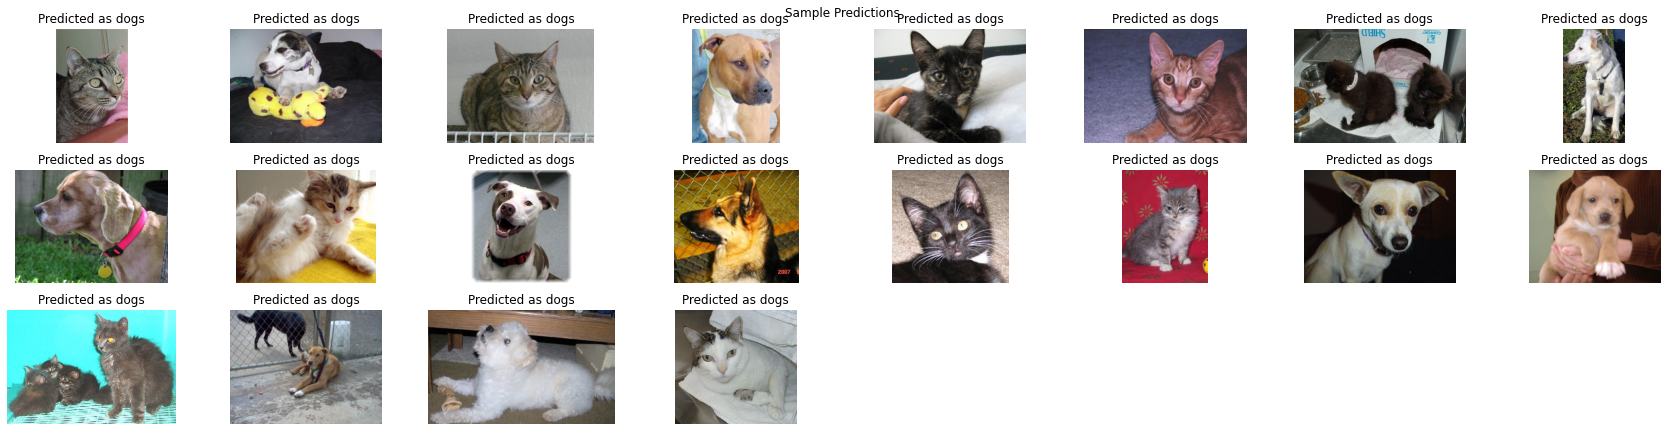

In [79]:
sample_test = test.sample(20).reset_index(drop = True)

fig = plt.figure(1, figsize = (24, 20))
fig.suptitle("Sample Predictions")

for i in range(len(sample_test)):
    
    plt.subplot(10, 8, i + 1)
    image = load_img(sample_test.filepath[i])
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"Predicted as {sample_test['test_preds'][i]}")
    
plt.tight_layout()
plt.show()